<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://kdd.isti.cnr.it/people/riccardo-guidotti">Riccardo Guidotti</a><br/>
<b>Python version:</b>  3.x<br/>
</span>

<img align="right" width="250" src="https://nullpointerexception1.files.wordpress.com/2017/11/decision-tree-e1513448957591.jpg?w=1400&h=9999">

# Classification with Python

This notebook contains an overview of basic python functionalities for classification using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img align="right" width="150" src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg">

## Iris Dataset  
[Link](https://archive.ics.uci.edu/ml/datasets/iris) to the dataset on the UCI Machine Learning Repository.  
As first step we load the whole Iris Dataset and make confidence with its features.  

In [7]:
df = pd.read_csv("data/iris.csv", skipinitialspace=True, sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
The predictive attribute is the class of the iris plant. 

Fetures:
* sepal length (in cm)
* sepal width (in cm)
* petal length (in cm) 
* petal width (in cm) 
* class: Iris-setosa, Iris-versicolour, Iris-virginica

Since classification is a ***supervised*** task we are interested in knowing the distribution of thetarget class.

In [9]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

Sometimes is useful to map a set of string into a set of integers.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
num_classes = le.fit_transform(df['class'])
print(num_classes[:5])

[0 0 0 0 0]


In [49]:
np.unique(num_classes, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

## Data Understanding

We observe the distributions of the attributes without considering the class.

In [12]:
from pandas.plotting import scatter_matrix

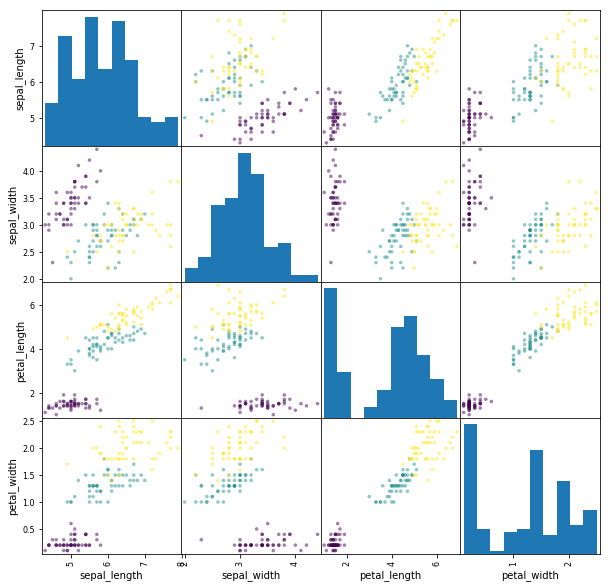

In [13]:
scatter_matrix(df, figsize=(10, 10), c=num_classes, s=50)
plt.show()

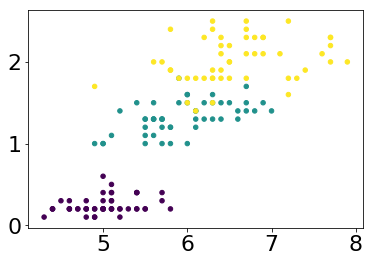

In [14]:
plt.scatter(df['sepal_length'], df['petal_width'], s=20, c=num_classes)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Classification Objective

Given a collection of records called ***training set*** where each record contains a set of ***attributes*** and one of the attributes is the ***target class***. The objective of classification is to find a model for the class attribute as a function of the values of other attributes.

The ***goal*** is to assign to a class previously unseen records as accurately as possible.
A ***test set*** is used to determine the accuracy of the model. 

Usually, the given data set is divided into training and test sets, with training set used to build
the model and test set used to validate it.

<img align="center" width="650" src="http://images.slideplayer.com/15/4732696/slides/slide_4.jpg"> 

## Classification Techniques
* ***Decision Tree***
* ***Instance-based methods***
* Rule-based methods
* Neural Networks
* Naïve Bayes and Bayesian Belief Networks
* Support Vector Machines (SVM)

## Evaluating the Performance of a Classifier

In order to evaluate the quality of classification there exist several measures: all of them built upon the concept of **Confusion Matrix**.

**Confusion Matrix**
In the field of machine learning a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="right" width="300" src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Given a Target class:
* ***True Positive (TP)*** represent those instances correctly predicted to be True
* ***False Positive (FP)*** represent those instances incorrectly predicted to be True
* ***True Negative (TN)*** represent those instances correctly predicted to be False
* ***False Negative (FT)*** represent those instances incorrectly predicted to be False 

Upon such classes are built several indicators.
Among the otehrs, two scores characterize the outcome of a predictive model: ***precision*** and ***recall***

* **Precision**: how many of the instances I predict to be True are really True? $\mathit{precision} = \frac{TP}{TP+FP}$
* **Recall**: how many True instances I was able to correctly predict? $\mathit{recall} = \frac{TP}{TP+FN}$

To summarize the overall performance of a model we can also use the ***accuracy*** and the ***f1-score***: 

* The **accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ captures the number of instances correctly classified above all
* $1-\mathit{accuracy}$ gives the errore rate, i.e., the error committed by the classifier.
* The **f1-score** $= \frac{2TP}{2TP+FP+FN}$ describes the armonic mean of precision and recall.

All these indicators are provided by [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Decision Tree

## Example of Decision Tree and Application
<img align="left" width="490" src="http://images.slideplayer.com/15/4732696/slides/slide_10.jpg">
<img align="right" width="490" src="http://images.slideplayer.com/15/4732696/slides/slide_13.jpg">

## The Algorithm in a Nutshell

**Objective:** Build the most accurate decision tree.

Given a set $D$ of training records.  
* If $D_x$ contains records that belong the same class $y$, then this is a leaf node labeled as $y$;
* If $D_x$ contains records that belong to more than one class, use the **best attribute** to split the data into smaller subsets $D_1, \dots D_k$.
* Recursively apply the procedure to each subset.

How to determine the best split: nodes with ***homogeneous*** class distribution are preferred.  
Thus, a measure of node ***impurity*** is required. Example of impurity nodes:
* Gini Index
* Entropy
* Misclassification error

How to determine when to stop splitting: there are various ***stopping criteria***:
* Stop expanding a node when all the records belong to the same class
* Stop expanding a node when all the records have similar attribute values
* Early termination (to be discussed later) 

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/Decision%20Tree)
Wikipedia [link](https://en.wikipedia.org/wiki/Decision_tree)

## Classification Problems

* Missing values: sophisticatd techniques are required to handle missing values
* The sklearn library does not allow missing values.
* Overfitting: the model is too accurate on the training data but its performance are poor on the test data.
* For a Decision Trees it means that the tree is more complex and deep than necessary.

## Decision Tree in Python  ([sklearn](http://scikit-learn.org/stable/modules/tree.html))

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the dataset into train and test

In [17]:
attributes = [col for col in df.columns if col != 'class']
X = df[attributes].values
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [18]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [19]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [20]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

sepal_length 0.0
sepal_width 0.026530612244897958
petal_length 0.04088301987461652
petal_width 0.9325863678804855


Visualize the decision tree

In [21]:
import pydotplus
from sklearn import tree
from IPython.display import Image

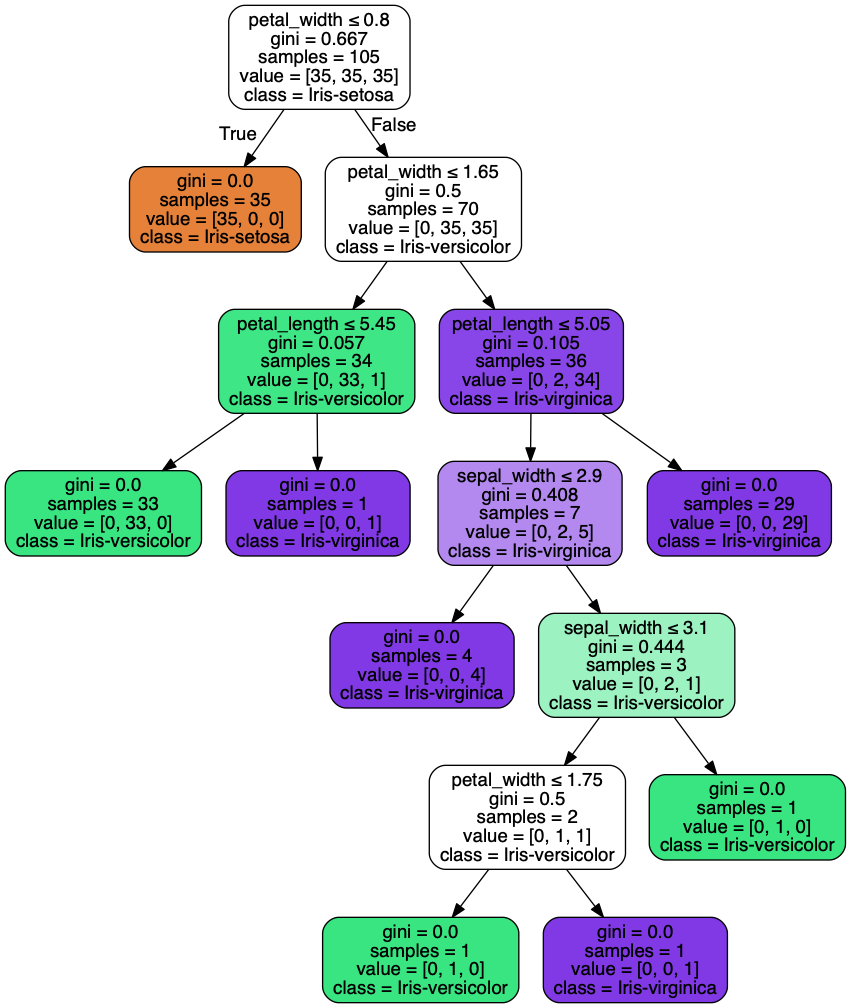

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

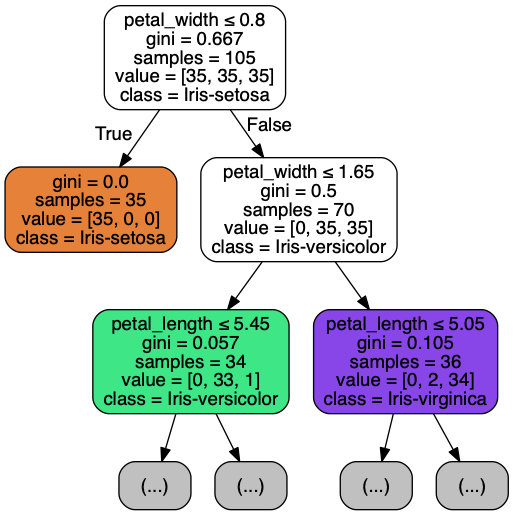

In [23]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Apply the decision tree on the training set

In [24]:
y_pred = clf.predict(X_train)

Evaluate the performance

In [25]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 1.0
F1-score [1. 1. 1.]


In [26]:
print(classification_report(y_train, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

      micro avg       1.00      1.00      1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [27]:
confusion_matrix(y_train, y_pred)

array([[35,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 35]])

Apply the decision tree on the test set and evaluate the performance

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.9555555555555556
F1-score [1.         0.9375     0.92857143]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

In [30]:
from sklearn.preprocessing import LabelBinarizer

In [31]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([1.        , 0.96666667, 0.93333333])

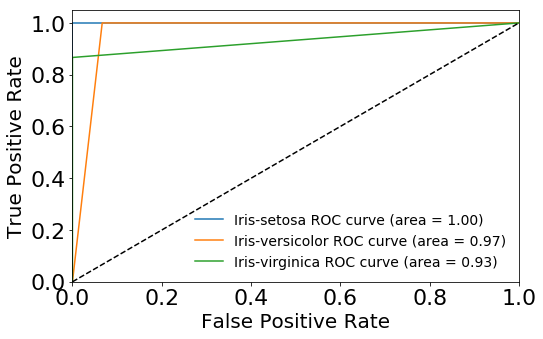

In [33]:
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation  
More options at [link](http://scikit-learn.org/stable/modules/cross_validation.html#)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9533 (+/- 0.09)
F1-score: 0.9597 (+/- 0.09)


In [36]:
scores

array([1.        , 0.93265993, 1.        , 0.93265993, 0.93265993,
       0.86666667, 0.93265993, 1.        , 1.        , 1.        ])

### Tuning the hyper-parameters

More options at [link](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [39]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X, y)
clf = grid_search.best_estimator_

In [40]:
report(grid_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.967 (std: 0.037)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 20}



In [41]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100, cv=5)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [42]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': 11}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 4}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 12}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 11}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 5}

Model with rank: 1
Mean validation score: 0.967 (std: 0.021)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}



## Any other Sklearn classifier can be used in the same way

Let see two examples: Random Forest and K-Nearest Neighbor

# Random Forest

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             class_weight=None)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9600 (+/- 0.09)
F1-score: 0.9530 (+/- 0.09)


In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
clf.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# K-Nearest Neighbors

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9667 (+/- 0.09)
F1-score: 0.9659 (+/- 0.09)
